In [6]:
import numpy as np
import pylab as pl
import scipy.stats as st
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Generate single chi-squared distribution with mean ~19 and standard deviation ~13
np.random.seed(999)
chi2 = st.chi2.rvs(1, loc=10, scale=10, size=1000)
print("Chi-squared sample mean: {:.3f}").format(chi2.mean())
print("Chi-squared standard deviation: {:.3f}".format(chi2.std()))

Chi-squared sample mean: 19.302
Chi-squared standard deviation: 12.771


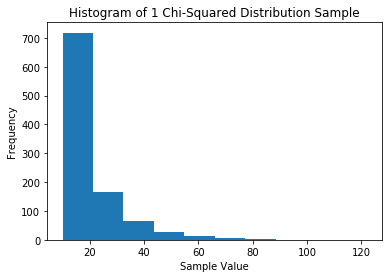

In [53]:
# Plot my sample distribution
plt.hist(chi2)
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.title('Histogram of 1 Chi-Squared Distribution Sample')

<b>Figure 1</b>: Histogram of sample values from a single chi-squared sample with size of 1000

In [45]:
# Calculate mean for each
y = np.zeros(1000)
for i in range(1000):
    y[i] = st.chi2.rvs(1, loc=10, scale=10, size=100).mean()
y.mean()

19.969411117151836

In [46]:
# Generate 100 samples and plot histogram
a = st.chi2.rvs(1, loc=10, scale=10, size=1000)

for elem in range(100):
    b = st.chi2.rvs(1, loc=10, scale=10, size=1000)
    a = np.append(a,b)

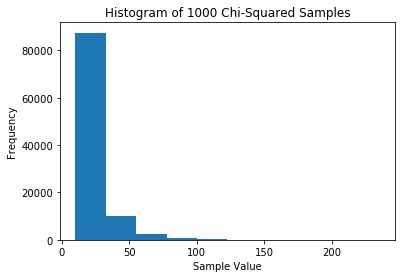

In [52]:
pl.hist(a)
pl.xlabel("Sample Value")
pl.ylabel("Frequency")
pl.title("Histogram of 1000 Chi-Squared Samples")

<b>Figure 2</b>: Histogram of sample values from a 1000 chi-squared samples with size of 1000

In [30]:
# Create function to get z-score with default mean and std parameters from before
def calculate_z(distribution, pop_mean=20, pop_std_dev=14.1):
    z = np.sqrt(len(distribution)) * (pop_mean - distribution.mean()) / pop_std_dev
    return z

In [32]:
# Run 1000 samples and get z-score
z = np.zeros(1000)
for i in range(1000):
    z[i] = calculate_z(st.chi2.rvs(1, loc=10, scale=10, size=100))

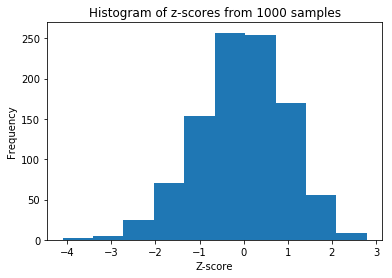

In [56]:
# Plot distribution of z-scores
pl.hist(z)
pl.xlabel('Z-score')
pl.ylabel('Frequency')
pl.title('Histogram of z-scores from 1000 samples')

<b>Figure 2</b>: Histogram of z-scores from 1000 samples showing Gaussian distribution

In [34]:
print("Z-score mean: {:.4f}".format(z.mean()))
print("Z-score standard deviation: {:.4f}".format(z.std()))

Z-score mean: -0.0379
Z-score standard deviation: 1.0103


<b>Observation</b>: Distribution of z-scores and test statistics above reflect a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

<b>Next step</b>: Test null hypothesis that the z-score distribution came from a Gaussian distribution at an alpha of 0.05.

In [35]:
# Choosing the KS statistic
st.kstest(z, "norm")

KstestResult(statistic=0.025294018453364014, pvalue=0.54435866656299126)

<b>Outcome</b>: P-value of 0.54 exeeds alpha of 0.05, so the null hypothesis that the distribution is Gaussian cannot be rejected.

<b>Last step - Ignore!!

In [213]:
z_freq = np.histogram(z,bins=[-3,-2,-1,0,1,2,3])[0]

In [214]:
np.random.seed(999)
rand_freq = np.histogram(np.random.randn(1,1,1000),bins=[-3,-2,-1,0,1,2,3])[0]

In [215]:
st.chisquare(z_freq, rand_freq)

Power_divergenceResult(statistic=8.0960978685010279, pvalue=0.15101840429894828)

According to the documentation, the chi-square null hypothesis is that "the categorical data has the given frequencies"